In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyaudio
import wave
import librosa.display
import librosa

In [2]:
# Stores an audio file for easy playback
class Audio():
    def __init__(self, filename):
        self.filename = filename
        self.chunk = 1024
        
        with wave.open(filename, 'rb') as wf:
            self.rate = wf.getframerate()
            self.total_sample_size = wf.getnframes()
    
    def time_series(self):
        return librosa.load(self.filename, sr=self.rate)[0]
    
#     Return the sample size for the given duration, return the maximum length of the sample size if duration exceed the sample's duration
    def get_sample_size(self, duration):
        return min(self.rate * duration, self.total_sample_size)
    
#     Play the audio file for the given duration, play the whole file if duration is not given
    def play(self, duration=0):
        wf = wave.open(self.filename, 'rb')
        p = pyaudio.PyAudio()
        
        stream = p.open(format =
                p.get_format_from_width(wf.getsampwidth()),
                channels = wf.getnchannels(),
                rate = wf.getframerate(),
                output = True)
        
        if duration:
            d_chunk = duration * wf.getframerate()
            data = wf.readframes(d_chunk)
            stream.write(data)
        else:
            data = wf.readframes(self.chunk)

            while len(data) > 0:
                stream.write(data)
                data = wf.readframes(self.chunk)
        
        stream.close()
        p.terminate()
        wf.close()

In [3]:
def plot_magnitude_spectogram(x, num_samples=5000, n_fft=2048, hop_length=512):
    x = x[:num_samples]
    
    D = np.abs(librosa.stft(x, n_fft=n_fft, hop_length=hop_length))
    t = np.arange(len(D))
    plt.title('Magnitude versus Frequency')
    plt.plot(t,D)
    plt.show()

In [4]:
def plot_phase_spectogram(x, num_samples=5000, n_fft=2048, hop_length=512):
    x = x[:num_samples]
    
    D = np.angle(librosa.stft(x, n_fft=n_fft, hop_length=hop_length))
    t = np.arange(len(D))
    plt.title('Phase versus Frequency')
    plt.plot(t,D)
    plt.show()

In [5]:
# x = floating point time series of audio files
# num_samples = number of samples to plot
def plot_db_scaled_spectogram(x, num_samples=5000, n_fft=2048, hop_length=512):
    x = x[:num_samples]

    D = librosa.amplitude_to_db(librosa.stft(x, n_fft=n_fft, hop_length=hop_length), ref=np.max)
    print(D.shape)
    librosa.display.specshow(D, y_axis='linear')
    plt.colorbar(format='%+2.0f dB')
    plt.title('DB spectogram')
    plt.show()

In [6]:
# y = floating point time series of audio files
# num_samples = number of samples to plot
def plot_wave(y, num_samples=5000):
    y = y[:num_samples]
    
    x = np.arange(num_samples)
    
    plt.plot(x,y)
    plt.show()

# Load Speakers
ex_1 = abbott = Brett W. Downey  
ex_2 = optic = Lucy Burgoyne  
ex_3 = maugham = Lilith Branda  
ex_4 = rohmer = Don W. Jenkins  
ex_5 = strickland = Ann Boulais  
ex_6 = vivian = David Wales  

In [7]:
ex_1 = Audio("./working_data/abbott_10.wav")
ex_2 = Audio("./working_data/optic_10.wav")
ex_3 = Audio("./working_data/maugham_10.wav")
ex_4 = Audio("./working_data/rohmer_10.wav")
ex_5 = Audio("./working_data/strickland_10.wav")
ex_6 = Audio("./working_data/vivian_10.wav")

In [8]:
ex_1_size = ex_1.get_sample_size(3)
plot_wave(ex_1.time_series(), ex_1_size)
plot_db_scaled_spectogram(ex_1.time_series(), ex_1_size)
plot_magnitude_spectogram(ex_1.time_series(), ex_1_size, 512, ex_1_size+1)
plot_phase_spectogram(ex_1.time_series(), ex_1_size, 512, ex_1_size+1)

KeyboardInterrupt: 

# Audio Wave for All Six Speakers (Amplitude versus Samples)

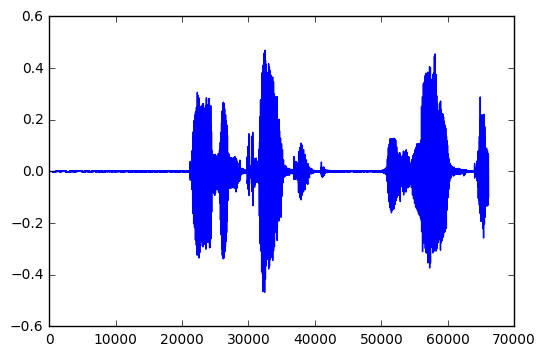

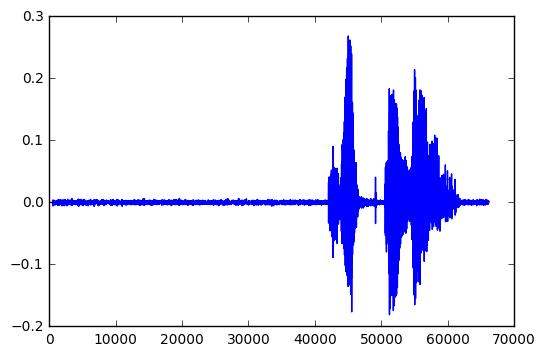

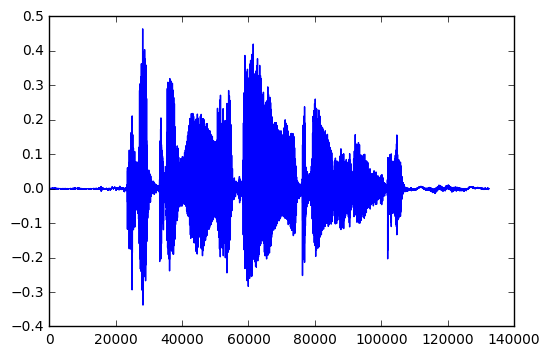

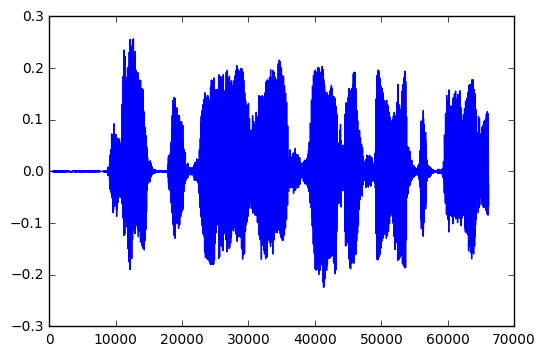

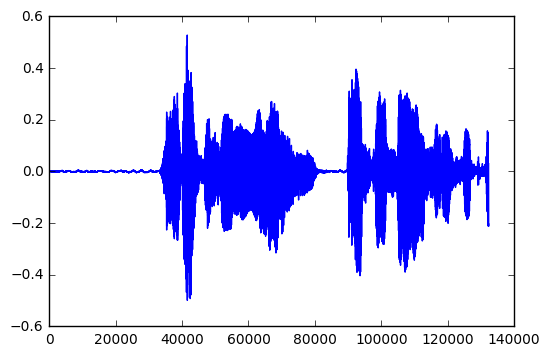

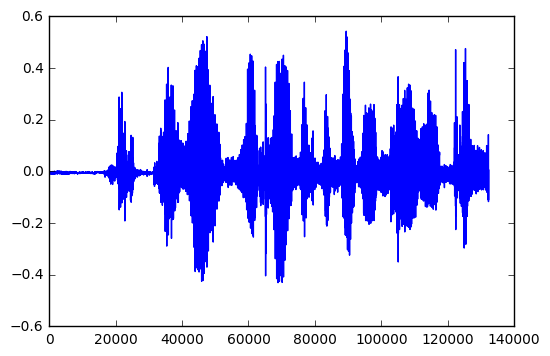

In [9]:
plot_wave(ex_1.time_series(), ex_1.get_sample_size(3))
plot_wave(ex_2.time_series(), ex_2.get_sample_size(3))
plot_wave(ex_3.time_series(), ex_3.get_sample_size(3))
plot_wave(ex_4.time_series(), ex_4.get_sample_size(3))
plot_wave(ex_5.time_series(), ex_5.get_sample_size(3))
plot_wave(ex_6.time_series(), ex_6.get_sample_size(3))

# DB Scaled Spectogram for All Six Speakers

(1025, 130)


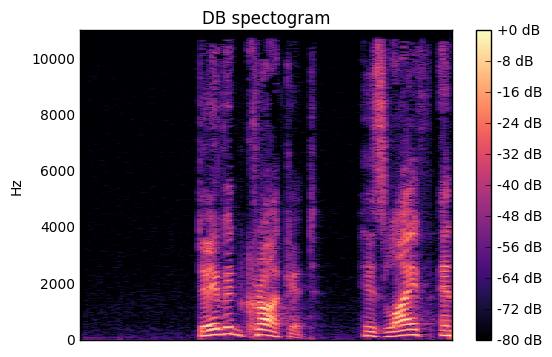

(1025, 130)


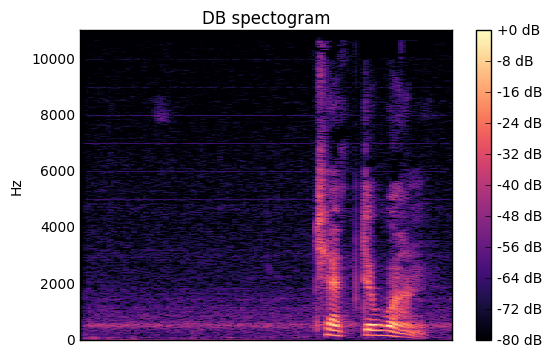

(1025, 259)


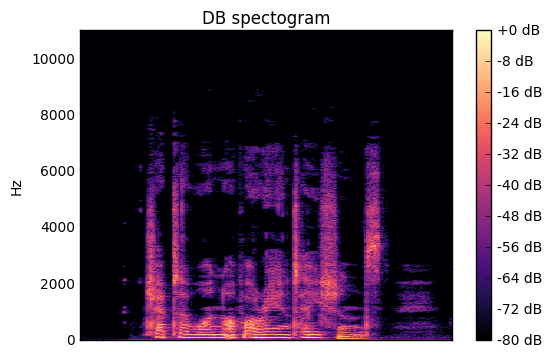

(1025, 130)


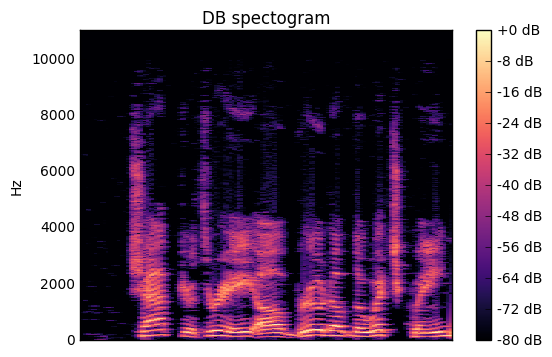

(1025, 259)


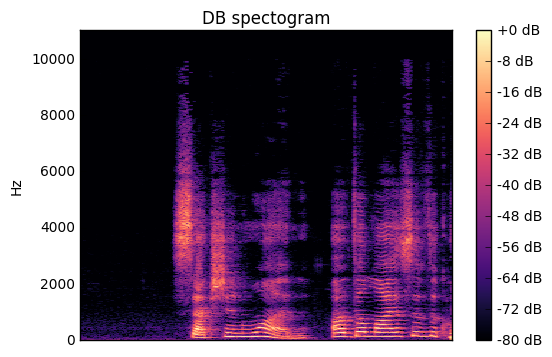

(1025, 259)


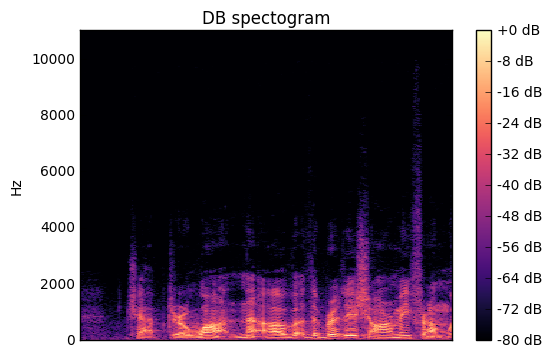

In [10]:
plot_db_scaled_spectogram(ex_1.time_series(), ex_1.get_sample_size(3))
plot_db_scaled_spectogram(ex_2.time_series(), ex_2.get_sample_size(3))
plot_db_scaled_spectogram(ex_3.time_series(), ex_3.get_sample_size(3))
plot_db_scaled_spectogram(ex_4.time_series(), ex_4.get_sample_size(3))
plot_db_scaled_spectogram(ex_5.time_series(), ex_5.get_sample_size(3))
plot_db_scaled_spectogram(ex_6.time_series(), ex_6.get_sample_size(3))

# Different N_FFT Size and Hop_Length Spectograms for Speaker 5

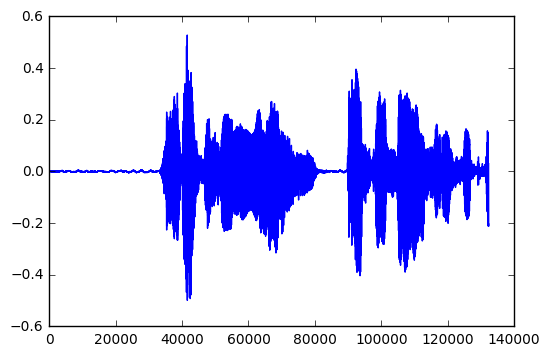

Nfft=2048, Hop_Length=512
(1025, 259)


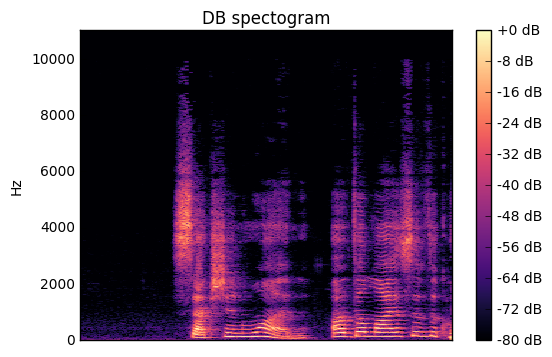

Nfft=4, Hop_Length=8192
(3, 17)


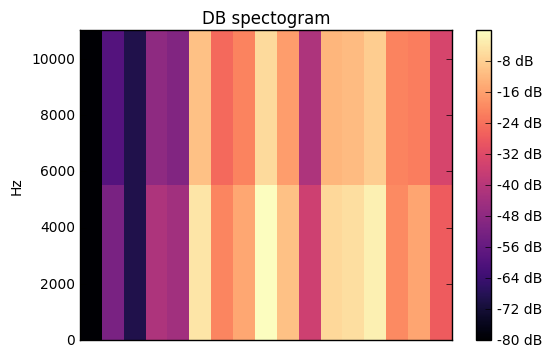

Nfft=16, Hop_Length=8192
(9, 17)


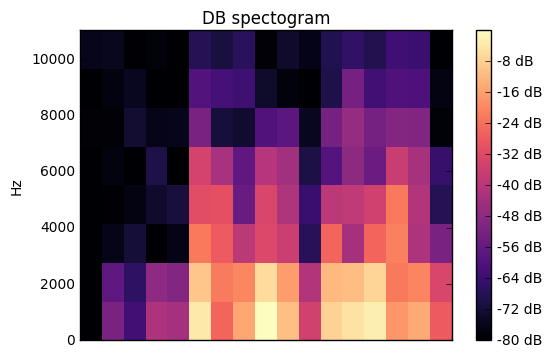

Nfft=64, Hop_Length=8192
(33, 17)


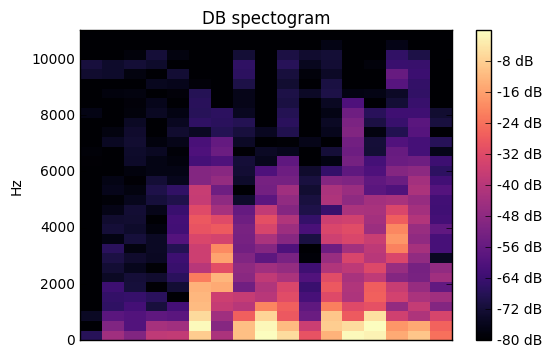

Nfft=4096, Hop_Length=8192
(2049, 17)


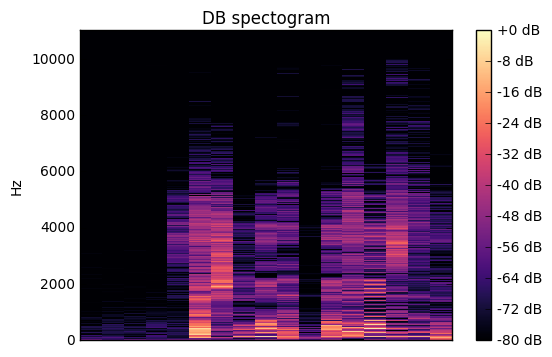

Nfft=64, Hop_Length=16834
(2049, 8)


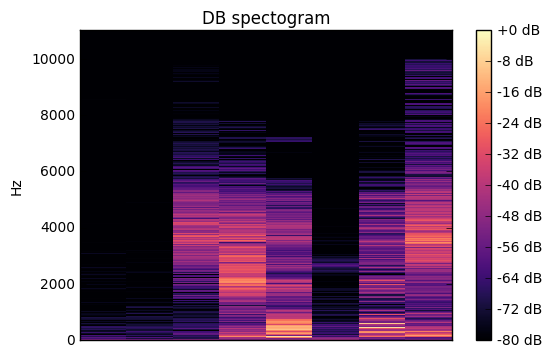

Nfft=64, Hop_Length=8192
(33, 17)


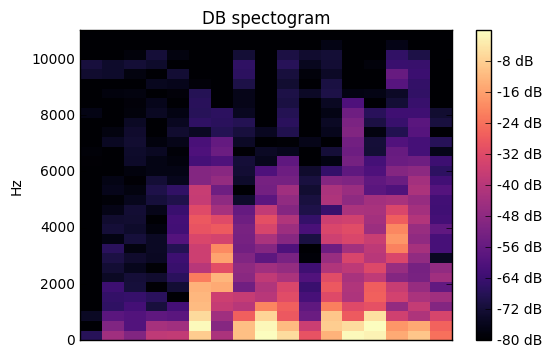

Nfft=64, Hop_Length=64
(33, 2068)


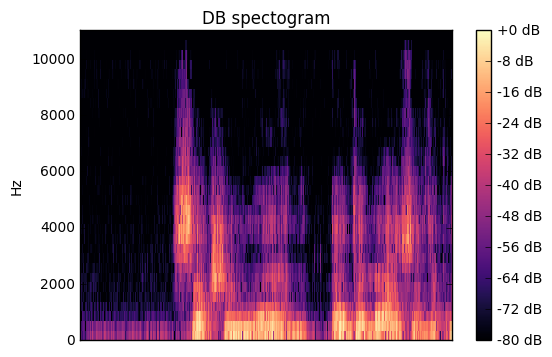

In [38]:
plot_wave(ex_5.time_series(), ex_5.get_sample_size(3))
print("Nfft={}, Hop_Length={}".format(2048,512))
plot_db_scaled_spectogram(ex_5.time_series(), ex_5.get_sample_size(3)) # Using n_fft=2048, hop_length=512
print("Nfft={}, Hop_Length={}".format(4,8192))
plot_db_scaled_spectogram(ex_5.time_series(), ex_5.get_sample_size(3), 4, 8192) # Using n_fft=4, hop_length=8192
print("Nfft={}, Hop_Length={}".format(16,8192))
plot_db_scaled_spectogram(ex_5.time_series(), ex_5.get_sample_size(3), 16, 8192) # Using n_fft=16, hop_length=8192
print("Nfft={}, Hop_Length={}".format(64,8192))
plot_db_scaled_spectogram(ex_5.time_series(), ex_5.get_sample_size(3), 64, 8192) # Using n_fft=64, hop_length=8192
print("Nfft={}, Hop_Length={}".format(4096,8192))
plot_db_scaled_spectogram(ex_5.time_series(), ex_5.get_sample_size(3), 4096, 8192) # Using n_fft=4096, hop_length=8192
print("Nfft={}, Hop_Length={}".format(64,16834))
plot_db_scaled_spectogram(ex_5.time_series(), ex_5.get_sample_size(3), 4096, 16834) # Using n_fft=4096, hop_length=8192
print("Nfft={}, Hop_Length={}".format(64,8192))
plot_db_scaled_spectogram(ex_5.time_series(), ex_5.get_sample_size(3), 64, 8192) # Using n_fft=64, hop_length=8192
print("Nfft={}, Hop_Length={}".format(64,64))
plot_db_scaled_spectogram(ex_5.time_series(), ex_5.get_sample_size(3), 64, 64) # Using n_fft=64, hop_length=64

# High Quality One

Nfft=8192, Hop_Length=32
(4097, 4135)


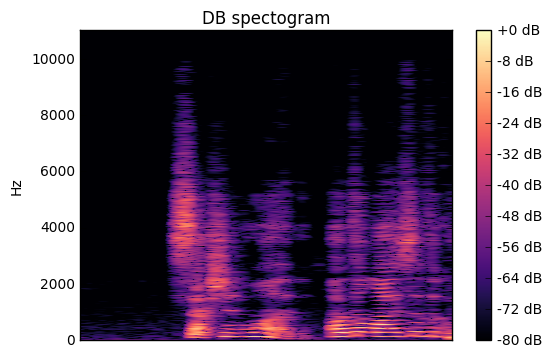

In [39]:
print("Nfft={}, Hop_Length={}".format(8192,32))
plot_db_scaled_spectogram(ex_5.time_series(), ex_5.get_sample_size(3), 8192, 32) # Using n_fft=8192, hop_length=32

### Classifying Audio

In [9]:
def convert_audio_to_example(audio, label, n_fft=2048, hop_length=512):
    D = librosa.stft(audio.time_series(), n_fft=n_fft, hop_length=hop_length)
    D = np.transpose(D)
    
    D = np.insert(D, D.shape[1], label, 1)
    return D

## Results
Number of examples for each speaker = [601,516,601,301,601,601]  
95% of them are used for training while 5% is used for testing
### KNeighborsClassifier, leaf_size=30, metric='minkowski', n_jobs=1, n_neighbors=5, weights='uniform'
2 speakers = 94.64%  
3 speakers = 89.53%  
4 speakers = 81.88%  
5 speakers = 78.63%  
6 speakers = 79.01%  

# SVM results, kernel=linear, C(penalty)=0.5
SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)  

**Note: Rate is the number of samples in one second**  
**Accuracy = 87.04%**, n_fft = 2048, hop_length = rate  
**Accuracy = 90.06%**, n_fft = 2048, hop_length = rate / 2  
**Accuracy = 81.48%**, n_fft = 2048, hop_length = rate \* 2  
**Accuracy = 75.93%**, n_fft = 512, hop_length = rate  
**Accuracy = 90.74%**, n_fft = 4096, hop_length = rate  
**Accuracy = 91.09%**, n_fft = 4096, hop_length = rate / 2  
**Accuracy = 93.16%**, n_fft = 4096, hop_length = rate / 3  
**Accuracy = 96.43%**, n_fft = 4096, hop_length = rate / 4  





  


In [12]:
# E_1 = convert_audio_to_example(ex_1, 0, 2048*4, ex_1.rate//4)
# E_2 = convert_audio_to_example(ex_2, 1, 2048*4, ex_2.rate//4)
# E_3 = convert_audio_to_example(ex_3, 2, 2048*4, ex_3.rate//4)
# E_4 = convert_audio_to_example(ex_4, 3, 2048*4, ex_3.rate//4)
# E_5 = convert_audio_to_example(ex_5, 4, 2048*4, ex_3.rate//4)
# E_6 = convert_audio_to_example(ex_6, 5, 2048*4, ex_3.rate//4)
# E = np.concatenate([E_1, E_2, E_3, E_4, E_5, E_6])

# training_size = len(E) * 95 // 100
# testing_size = len(E) - training_size
# print("Example Size: ")
# print(len(E_1))
# print(len(E_2))
# print(len(E_3))
# print(len(E_4))
# print(len(E_5))
# print(len(E_6))
# print("Training_size: {}\nTesting_size: {}".format(training_size, testing_size))
# np.random.shuffle(E)
# train = E[:training_size]
# test = E[training_size:]

In [13]:
# np.random.shuffle(E)
# train = E[:training_size]
# test = E[training_size:]

In [14]:
# features = np.abs(train[:,:-1])
# labels = np.abs(train[:,-1])

# features_t = np.abs(test[:,:-1])
# labels_t = np.abs(test[:,-1])

In [15]:
# from sklearn import neighbors
# knn = neighbors.KNeighborsClassifier()
# knn.fit(features, labels)
# print(knn.score(features_t, labels_t))
# print(knn)

# Support Vector Classifier
linear: $\langle x, x'\rangle$.  
polynomial: $(\gamma \langle x, x'\rangle + r)^d$. $d$ is specified by keyword degree, $r$ by $coef0$.  
rbf: $\exp(-\gamma |x-x'|^2)$. $\gamma$ is specified by keyword $gamma$, must be greater than $0$.  
sigmoid: $(\tanh(\gamma \langle x,x'\rangle + r))$, where $r$ is specified by $coef0$.

In [16]:
# # C = penalty parameter, reduce it if your data has a lot of noise
# from sklearn.svm import SVC
# clf = SVC(C=0.5, kernel='linear')
# clf.fit(features, labels) 
# print(clf.score(features_t, labels_t))
# print(clf)

In [17]:
# from sklearn.svm import SVC
# clf = SVC()
# clf.fit(features, labels) 
# print(clf.score(features_t, labels_t))
# print(clf)

In [18]:
# from sklearn.svm import SVC
# clf = SVC(kernel='poly')
# clf.fit(features, labels) 
# print(clf.score(features_t, labels_t))
# print(clf)